<a href="https://colab.research.google.com/github/Uros-Males/Minimization_Problem_On_Identical_Machines_Analysis/blob/main/Analyzing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#IN PROGRESS....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import time

df = pd.read_csv('/content/sample_data/C-instances-runtime-analysis.csv')

shuffled = df.sample(frac=1).reset_index()

columns_dont_want = ['y', 'index', 'inst.name', 'CPLEXStatus','type']
select = [x for x in shuffled.columns if x not in columns_dont_want]

X = shuffled.loc[:, select]

y = shuffled.loc[:,'y']


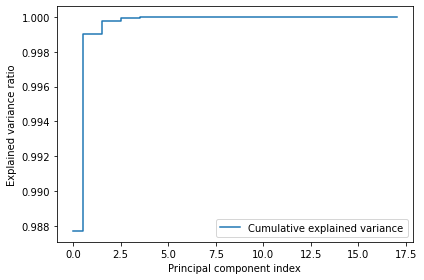

In [2]:
X['m/n'] = X['m/n'].apply(lambda x: x*100000)
X['(m/n)^2'] = X['(m/n)^2'].apply(lambda x: x*100000)
X['(m/n)^3'] = X['(m/n)^3'].apply(lambda x: x*100000)
X_copy = X

from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_copy)
data_pca = pca.transform(X_copy)

exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

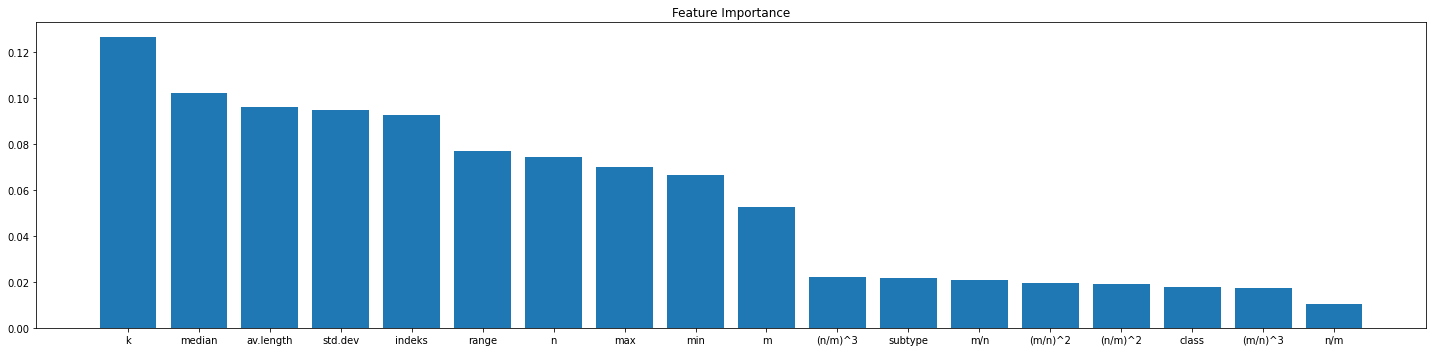

In [3]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 50)
model.fit(X.astype('int'), y.astype('int'))
importances = model.feature_importances_

sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = df.columns[1:]

fig = plt.figure(figsize = (20, 5))
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[sorted_indices])
plt.tight_layout()
plt.show()

In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_scores(df):
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Features"] = df.columns
    VIF_Scores["VIF Scores"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return VIF_Scores

vif_scores(X).round(1)


/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Independent Features,VIF Scores
0,subtype,11906.8
1,class,10.8
2,indeks,4.7
3,n,46.2
4,m,22.5
5,n/m,283628.1
6,(n/m)^2,429027.6
7,(n/m)^3,83884.4
8,m/n,59002.0
9,(m/n)^2,72521.3


In [5]:
corr = X.corr()
corr.style.background_gradient()

,subtype,class,indeks,n,m,n/m,(n/m)^2,(n/m)^3,m/n,(m/n)^2,(m/n)^3,av.length,std.dev,median,range,min,max,k
subtype,1.000000,-0.000000,0.000000,0.008854,-0.648089,0.919441,0.844094,0.781564,-0.994674,-0.964704,-0.914630,0.002786,0.002849,0.002652,0.002714,0.002829,0.002830,0.005747
class,-0.000000,1.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.682816,0.651998,0.682142,0.660820,0.660191,0.682595,0.417605
indeks,0.000000,-0.000000,1.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.002080,-0.002397,-0.002367,-0.001470,0.004281,-0.000188,-0.000123
n,0.008854,-0.000000,-0.000000,1.000000,0.671534,0.018212,0.024270,0.029337,-0.007408,-0.005316,-0.005099,0.314771,0.332278,0.309328,0.337380,0.248929,0.328105,0.741326
m,-0.648089,0.000000,-0.000000,0.671534,1.000000,-0.587461,-0.532768,-0.487548,0.650812,0.637933,0.610661,0.211427,0.223364,0.207894,0.226995,0.166177,0.220452,0.498816
n/m,0.919441,0.000000,0.000000,0.018212,-0.587461,1.000000,0.985121,0.956690,-0.905423,-0.813919,-0.729471,0.005682,0.005947,0.005484,0.005884,0.004938,0.005861,0.012053
(n/m)^2,0.844094,0.000000,-0.000000,0.024270,-0.532768,0.985121,1.000000,0.992114,-0.824205,-0.714125,-0.621992,0.007554,0.007957,0.007318,0.007953,0.006256,0.007824,0.016148
(n/m)^3,0.781564,0.000000,0.000000,0.029337,-0.487548,0.956690,0.992114,1.000000,-0.757230,-0.639315,-0.545881,0.009121,0.009637,0.008853,0.009679,0.007372,0.009466,0.019569
m/n,-0.994674,0.000000,-0.000000,-0.007408,0.650812,-0.905423,-0.824205,-0.757230,1.000000,0.981499,0.941804,-0.002347,-0.002354,-0.002208,-0.002168,-0.002667,-0.002355,-0.004729
(m/n)^2,-0.964704,0.000000,-0.000000,-0.005316,0.637933,-0.813919,-0.714125,-0.639315,0.981499,1.000000,0.988191,-0.001706,-0.001649,-0.001571,-0.001416,-0.002319,-0.001672,-0.003287


In [6]:
X_modified = X.drop(['max', 'n/m', '(n/m)^2', '(n/m)^3', 'm/n', '(m/n)^2', '(m/n)^3', 'class', 'av.length'], axis = 1)
vif_scores(X_modified).round(1)

,Independent Features,VIF Scores
0,subtype,7.3
1,indeks,3.9
2,n,37.7
3,m,11.4
4,std.dev,59.4
5,median,184.2
6,range,96.7
7,min,28.0
8,k,75.9


In [7]:
corr = X_modified.corr()
corr.style.background_gradient()

,subtype,indeks,n,m,std.dev,median,range,min,k
subtype,1.000000,0.000000,0.008854,-0.648089,0.002849,0.002652,0.002714,0.002829,0.005747
indeks,0.000000,1.000000,-0.000000,-0.000000,-0.002397,-0.002367,-0.001470,0.004281,-0.000123
n,0.008854,-0.000000,1.000000,0.671534,0.332278,0.309328,0.337380,0.248929,0.741326
m,-0.648089,-0.000000,0.671534,1.000000,0.223364,0.207894,0.226995,0.166177,0.498816
std.dev,0.002849,-0.002397,0.332278,0.223364,1.000000,0.956729,0.959279,0.845353,0.829030
median,0.002652,-0.002367,0.309328,0.207894,0.956729,1.000000,0.971537,0.917216,0.760764
range,0.002714,-0.001470,0.337380,0.226995,0.959279,0.971537,1.000000,0.818234,0.801225
min,0.002829,0.004281,0.248929,0.166177,0.845353,0.917216,0.818234,1.000000,0.630613
k,0.005747,-0.000123,0.741326,0.498816,0.829030,0.760764,0.801225,0.630613,1.000000


In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 5)
pca.fit(X)
data_pca = pca.transform(X)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5'])

corr = data_pca.corr()
corr.style.background_gradient()

,PC1,PC2,PC3,PC4,PC5
PC1,1.000000,-0.000000,-0.000000,0.000000,-0.000000
PC2,-0.000000,1.000000,0.000000,-0.000000,0.000000
PC3,-0.000000,0.000000,1.000000,-0.000000,-0.000000
PC4,0.000000,-0.000000,-0.000000,1.000000,-0.000000
PC5,-0.000000,0.000000,-0.000000,-0.000000,1.000000


In [9]:
print(pd.DataFrame(pca.components_, columns=X.columns,index = ['PC1','PC2','PC3','PC4','PC5']))

      subtype         class        indeks         n         m       n/m  \
PC1 -0.000269 -1.414074e-10  3.030178e-13 -0.000025  0.000931 -0.000167   
PC2  0.000320  1.758995e-07 -4.139035e-10  0.000318 -0.000624  0.000780   
PC3  0.000002  3.078114e-03 -6.992743e-06  0.044331  0.011689  0.000023   
PC4 -0.000502 -1.373335e-04  3.181226e-07  0.012411  0.002078  0.002726   
PC5  0.000332 -8.110669e-03  3.302640e-06  0.868968  0.232825 -0.000062   

      (n/m)^2   (n/m)^3       m/n   (m/n)^2   (m/n)^3  av.length   std.dev  \
PC1 -0.001943 -0.019606  0.843739  0.483044  0.233203  -0.000024 -0.000006   
PC2  0.012244  0.145681 -0.502290  0.583374  0.621292   0.000305  0.000091   
PC3  0.000500  0.007524  0.000453  0.001760 -0.004437   0.386636  0.101626   
PC4  0.056279  0.800905 -0.022937  0.316351 -0.504488  -0.004094 -0.000762   
PC5  0.000158  0.022213  0.010902 -0.036895  0.038009  -0.115658  0.020432   

       median     range       min       max         k  
PC1 -0.000022 -0.000028 